In [1]:
import sys

sys.path.append("../extraction_core/")
from predict import TableExtractor

/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import albumentations as album
from data import fs
from albumentations.pytorch.transforms import ToTensorV2
from pathlib import Path

transforms = album.Compose([
    album.Resize(896, 896, always_apply=True),
    album.Normalize(),
    ToTensorV2()
])
version = 4
checkpoint_path = "projet-ssplab/comptes-sociaux/logs/TableNetModule/version_00/checkpoints/"

table_extractor = None
for checkpoints in fs.ls(checkpoint_path):
    if (Path(checkpoints).suffix == ".ckpt" and
            Path(checkpoints).name != "last.ckpt"):
        table_extractor = TableExtractor(
            checkpoint_path=checkpoints,
            transforms=transforms
        )
        break

In [3]:
table_extractor

In [4]:
from PIL import Image

siren = "305756413"
data_dir = "../extraction_core/data/marmot_data"
test_image = Path(data_dir).joinpath(siren + ".bmp")

image = Image.open(test_image)
out = table_extractor.extract(image)

/home/coder/work/comptes-sociaux-to-tableau-fp-csv/notebooks/../extraction_core/column_assembler.py:45: RuntimeWarning: Mean of empty slice.
  mean_top_diffs = [(df.top.unique()[1:] - df.top.unique()[:-1]).mean()
/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


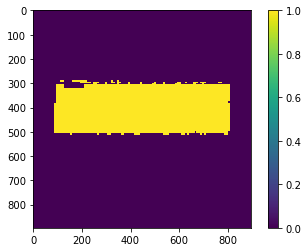

In [5]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
plt.plot()
plt.imshow(out['table_mask'], interpolation='none')
plt.colorbar(orientation='vertical')

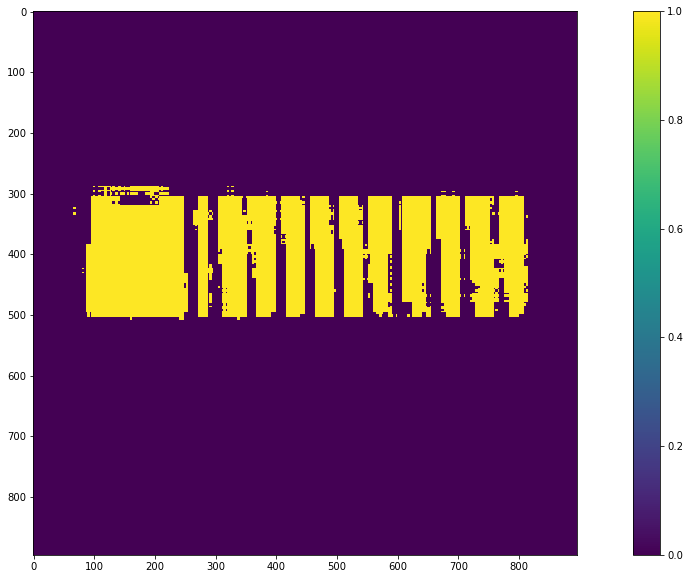

In [6]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot()
plt.imshow(out['column_mask'], interpolation='none')
plt.colorbar(orientation='vertical')
plt.savefig("column_mask.png")

In [7]:
for i, df in enumerate(out['tables']):
    print(df)

                                        col                             col  \
line_id                                                                       
1        ns de l'exercice s'élèvent à 1281}                             NaN   
2          e pour dépréciations exceptionne                             NaN   
3              ours s'élèvent à 3 675 K€ et                             NaN   
4          s : le conditionnement des matic                             NaN   
5          rnisation du réseau informatique                             NaN   
6                                    cières                             NaN   
7             icières ont diminué de 31 093                             NaN   
8                            5CM AS Norway.                             NaN   
9                                       NaN  ntant de 3 670 KE a été compta   
10                                      NaN                             NaN   
11                                      NaN         